<a href="https://colab.research.google.com/github/Jaswanth1101-g/Community-Health-Outbreak-Prevention-System/blob/main/Community_Health_Outbreak_Prevention_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚨 Suspicious Claims Detected:
     claim_id  age  claim_amount  num_previous_claims  hospital_stay_days
500       501   25       50000.0                   15                   2
501       502   30       48000.0                   18                   1
502       503   60       52000.0                   20                   1
503       504   55       47000.0                   22                   3
504       505   35       51000.0                   19                   2


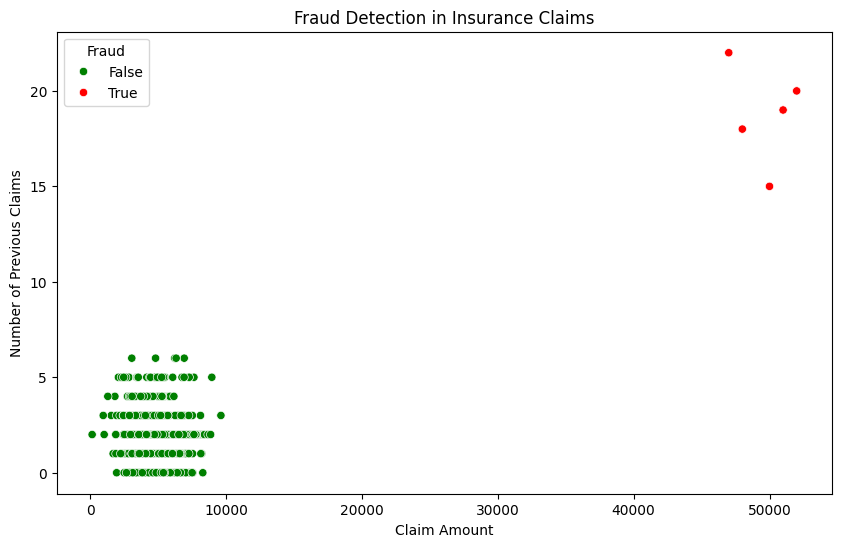

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# 1. Sample Insurance Claims Dataset (Replace with actual file path or API source)
# -----------------------
# Simulated DataFrame
np.random.seed(42)
n_samples = 500
claims_data = pd.DataFrame({
    'claim_id': np.arange(1, n_samples+1),
    'age': np.random.randint(20, 70, size=n_samples),
    'claim_amount': np.random.normal(5000, 1500, size=n_samples),
    'num_previous_claims': np.random.poisson(2, size=n_samples),
    'hospital_stay_days': np.random.randint(1, 15, size=n_samples)
})

# Add a few suspicious/fraudulent entries
fraud_entries = pd.DataFrame({
    'claim_id': np.arange(n_samples+1, n_samples+6),
    'age': [25, 30, 60, 55, 35],
    'claim_amount': [50000, 48000, 52000, 47000, 51000],  # suspiciously high
    'num_previous_claims': [15, 18, 20, 22, 19],
    'hospital_stay_days': [2, 1, 1, 3, 2]
})
claims_data = pd.concat([claims_data, fraud_entries], ignore_index=True)

# -----------------------
# 2. Feature Scaling
# -----------------------
features = ['age', 'claim_amount', 'num_previous_claims', 'hospital_stay_days']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(claims_data[features])

# -----------------------
# 3. DBSCAN for Anomaly Detection
# -----------------------
dbscan = DBSCAN(eps=1.5, min_samples=10)  # You can tune eps & min_samples
claims_data['cluster'] = dbscan.fit_predict(X_scaled)

# Outliers have cluster = -1
claims_data['is_fraud'] = claims_data['cluster'] == -1

# -----------------------
# 4. Output Fraudulent Claims
# -----------------------
suspicious_claims = claims_data[claims_data['is_fraud']]
print("🚨 Suspicious Claims Detected:")
print(suspicious_claims[['claim_id', 'age', 'claim_amount', 'num_previous_claims', 'hospital_stay_days']])

# -----------------------
# 5. Optional: Visualization
# -----------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=claims_data, x='claim_amount', y='num_previous_claims', hue='is_fraud', palette={True: 'red', False: 'green'})
plt.title("Fraud Detection in Insurance Claims")
plt.xlabel("Claim Amount")
plt.ylabel("Number of Previous Claims")
plt.legend(title="Fraud")
plt.show()


🔹 Dataset Preview:
   claim_id  age  claim_amount  num_previous_claims  hospital_stay_days
0         1   58        138.10                    2                  14
1         2   48       3463.42                    1                  11
2         3   34       4621.15                    0                   2
3         4   62       3128.33                    3                  12
4         5   27       7448.62                    3                   3

🚨 Suspicious Claims:
     claim_id  age  claim_amount  num_previous_claims  hospital_stay_days
500       501   25       50000.0                   15                   2
501       502   30       48000.0                   18                   1
502       503   60       52000.0                   20                   1
503       504   55       47000.0                   22                   3
504       505   35       51000.0                   19                   2


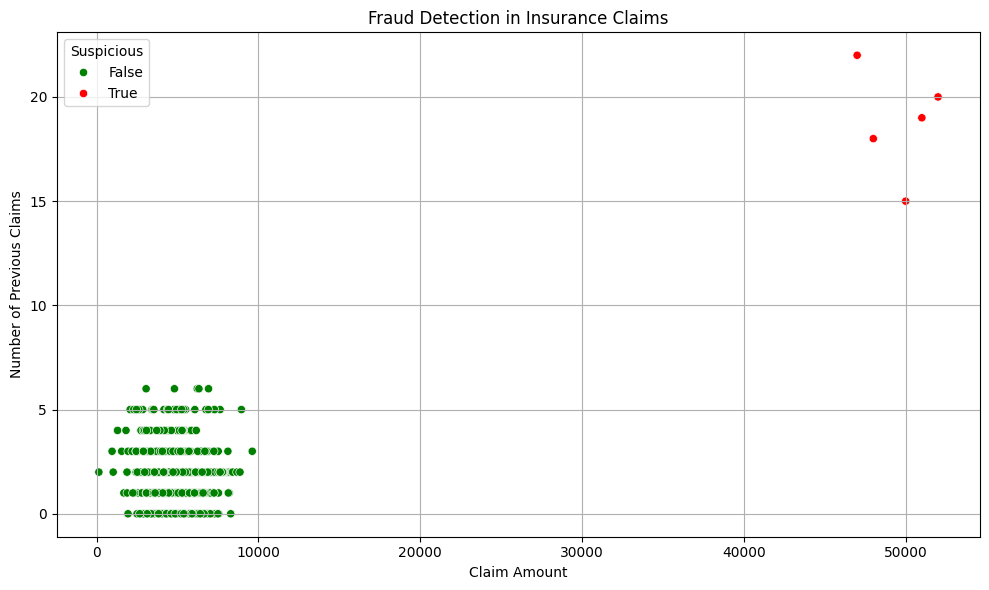


✅ Suspicious claims saved to 'suspicious_claims_output.xlsx'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load Excel File
# ---------------------------
file_path = "insurance_claims_sample.xlsx"  # if using locally
data = pd.read_excel(file_path)

# Preview
print("🔹 Dataset Preview:")
print(data.head())

# ---------------------------
# 2. Preprocessing
# ---------------------------
features = ['age', 'claim_amount', 'num_previous_claims', 'hospital_stay_days']

# Check for missing values
if data[features].isnull().sum().sum() > 0:
    data.dropna(subset=features, inplace=True)

# ---------------------------
# 3. Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# ---------------------------
# 4. DBSCAN Clustering for Anomaly Detection
# ---------------------------
db = DBSCAN(eps=1.5, min_samples=10)
data['cluster'] = db.fit_predict(X_scaled)

# ---------------------------
# 5. Marking Suspicious Claims
# ---------------------------
data['is_suspicious'] = data['cluster'] == -1

# Output suspicious records
print("\n🚨 Suspicious Claims:")
print(data[data['is_suspicious']][['claim_id', 'age', 'claim_amount', 'num_previous_claims', 'hospital_stay_days']])

# ---------------------------
# 6. Visualization (Optional)
# ---------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='claim_amount', y='num_previous_claims', hue='is_suspicious', palette={True: 'red', False: 'green'})
plt.title("Fraud Detection in Insurance Claims")
plt.xlabel("Claim Amount")
plt.ylabel("Number of Previous Claims")
plt.legend(title="Suspicious")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Save Suspicious Claims to Excel
# ---------------------------
suspicious_claims = data[data['is_suspicious']]
suspicious_claims.to_excel("suspicious_claims_output.xlsx", index=False)
print("\n✅ Suspicious claims saved to 'suspicious_claims_output.xlsx'")
